In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [9]:
def next_x(x, u, dt):
    """
    現在の x, u の値から、dt 後のxを求める関数。
    args:
    + x: 時刻 t での空間座標
    + u: 時刻 t での速度
    + dt: 線形近似する時間幅
    return:
     時刻t+dtでのxの値
    """
    return x + u * dt

In [4]:
def next_uxuz_air(ux, uz, dt, g, rho, a, m):
    """
    現在の (ux, uz) の値から、dt 後の (ux, uz) を求める関数。
    空気抵抗を考慮する
    args:
    + ux, uz: 時刻 t での(x-z)方向速度 [m/s]
    + dt: 線形近似する時間幅 [s]
    + g: 重力加速度の値 [m/s^2]
    + rho: 空気の密度 [kg/m^3]
    + a: 物体の半径 [m]
    + m: 物体の質量 [kg]
    return:
     時刻t+dt での u の値
    """
    # 効力係数
    CD = 0.44
    # 速度の絶対値
    u = np.sqrt(ux**2 + uz**2)
    # 空気抵抗の大きさ
    D = 0.5 * rho * u**2.0 * np.pi * a**2.0 * CD
    # 空気抵抗の x-z 方向成分
    Dx = - D * ux / u
    Dz = - D * uz / u
    
    ux_next = ux + Dx/m * dt
    uz_next = uz + Dz/m * dt - g * dt
    return ux_next, uz_next

In [17]:
def solve_shahou_air(x0, z0, ux0, uz0, dt, tmax, a, m):
    """
    t=0 に位置h、速度u0の物体の自由落下をシミュレートする関数。
    args:
    + x0, z0: t=0での(x, z)座標 [m]
    + u0: t=0での(x, z)方向速度 [m/s]
    + dt: オイラー法を用いるための時間軸の刻み幅 [s]
    + tmax: 追跡を行う最大時間 [s]
    + rho: 空気の密度 [kg/m^3]
    + a: 物体の半径 [m]
    + m: 物体の質量 [kg]
    """
    # 計算結果を代入するリスト
    x_list = []
    z_list = []
    ux_list = []
    uz_list = []
    t_list = []
    
    g = 9.81 # 重力加速度 [m/s^2]
    rho = 1.261 # kg/m^3
    
    # 初期値の代入
    x = x0
    z = z0
    ux = ux0
    uz = uz0
    t = 0.0
    
    while(t < tmax):
        x_list.append(x)
        z_list.append(z)
        ux_list.append(ux)
        uz_list.append(uz)
        t_list.append(t)
        
        # x, u, tの値の更新
        x = next_x(x,ux,dt)
        z = next_x(z,uz,dt)
        ux, uz = next_uxuz_air(ux, uz, dt, g, rho, a, m)
        t = t + dt
        
        if z < 0.0:
            break
    # 以下のように、Pythonでは関数の戻り値を複数にすることができる。
    return x_list, z_list, ux_list, uz_list, t_list

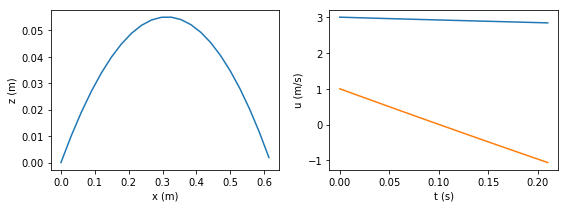

In [21]:
# 数値解。　複数の戻り値を受け取るには以下のようにする。
x_list, z_list, ux_list, uz_list, t_list = \
    solve_shahou_air(0.0, 0.0, 3.0, 1.0, 0.01, 30.0, 0.1, 0.1)

plt.figure(figsize=(8,3))
# t vs x のグラフ
plt.subplot(1,2,1)
plt.plot(x_list, z_list)
plt.xlabel('x (m)')
plt.ylabel('z (m)')
# t vs u のグラフ
plt.subplot(1,2,2)
plt.plot(t_list, ux_list)
plt.plot(t_list, uz_list)
plt.xlabel('t (s)')
plt.ylabel('u (m/s)')
# 2つのグラフを綺麗に配置する。
plt.tight_layout()

In [22]:
v = 165 * 1.0e3 / 3600 # km/h -> m/s
a = 0.036
m = 0.145

In [28]:
x_max = []
theta_list = []
x_list2 = []
z_list2 = []

for theta in np.linspace(0, 0.5 * np.pi, 100):
    ux = v * np.cos(theta)
    uz = v * np.sin(theta)
    x_list, z_list, ux_list, uz_list, t_list = \
        solve_shahou_air(0.0, 0.0, ux, uz, 0.01, 30.0, a, m)
    
    x_max.append(x_list[-1])
    theta_list.append(theta)
    x_list2.append(x_list)
    z_list2.append(z_list)

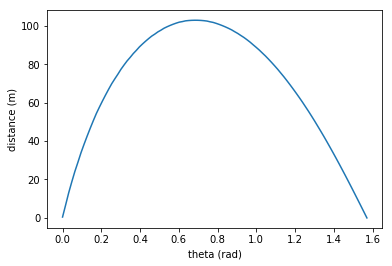

In [29]:
plt.plot(theta_list, x_max)
plt.xlabel('theta (rad)')
plt.ylabel('distance (m)')

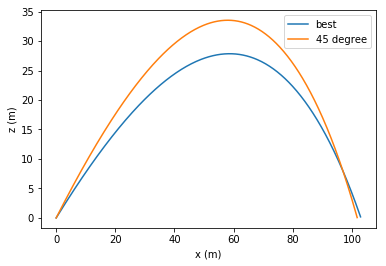

In [33]:
index = np.argmax(x_max)
index_45 = np.argmin(np.abs(np.array(theta_list) - np.pi/4))
plt.plot(x_list2[index], z_list2[index], label='best')
plt.plot(x_list2[index_45], z_list2[index_45], label='45 degree')
plt.xlabel('x (m)')
plt.ylabel('z (m)')
plt.legend()